In [1]:
#animals
import random 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

animals = open('animals.dat', 'r')
data = animals.readlines()
data = data[0].strip('\n')

r = 32
c = 84

data = data.split(',')

matrix = []
for i in range(r):
    matrix.append(data[c*i:c*(i+1)])
    
matrix = np.array(matrix)
matrix = matrix.astype(float)

hidden = 100
    
weight = np.random.rand(100,84)*0.2

print(matrix.shape)

(32, 84)


In [2]:
def diff(arr1, arr2):
    if arr1.shape == arr2.shape:
        s = np.absolute(np.subtract(arr1, arr2))
        d = np.linalg.norm(s)
        return d
    else: 
        print("error in shape", arr1.shape, arr2.shape)

In [3]:
epoch = 20
step = 0.2 

print(diff(matrix[1], weight[1]))

for i in range(epoch):
    d = np.zeros(100)
    for n in matrix: 
        for w in range(100): 
            d[w] = diff(n, weight[w])
        w = np.argmin(d)
        size = 50-(int(i*2.5)) # 50 down to 0 or 1 
        maxn = min(w + size, 100)
        minn = max(w - size,0)
        #print(size, maxn,minn)
        
        for w in range(minn,maxn):
            weight[w] = weight[w] + step*(n - weight[w])
        #print(weight.shape)
            
print(weight.shape)
        

3.780481289427837
(100, 84)


In [4]:
animalnames = open('animalnames.txt', 'r')
data = animalnames.readlines()

animal = []
for a in data: 
    a = a.strip("\n")
    a = a.strip("\t")
    a = a.strip("''")
    animal.append(a)

In [5]:
pos = []

d = np.zeros(100)
#pos.append(1)
for i in range(32):
    for w in range(100): 
        d[w] = diff(matrix[i], weight[w])
    w = np.argmin(d)
    pos.append(w)

possort = pos.copy()

possort.sort()

print(pos)
print(possort)

done = []
toprint = []
for i,p in enumerate(possort):
    index = pos.index(p)
    done.append(index)
    #print(index, done)
    toprint.append(animal[pos.index(p)])
    #print(animal[pos.index(p)-1])
    pos[index] = 9999
    
print(len(toprint))

for i in toprint: 
    print(i)


[92, 61, 76, 52, 0, 3, 98, 66, 41, 59, 0, 21, 79, 34, 97, 0, 93, 5, 56, 87, 66, 7, 29, 21, 25, 98, 83, 76, 38, 71, 13, 47]
[0, 0, 0, 3, 5, 7, 13, 21, 21, 25, 29, 34, 38, 41, 47, 52, 56, 59, 61, 66, 66, 71, 76, 76, 79, 83, 87, 92, 93, 97, 98, 98]
32
beetle
dragonfly
grasshopper
butterfly
housefly
moskito
spider
duck
pelican
penguin
ostrich
frog
seaturtle
crocodile
walrus
bear
hyena
dog
ape
cat
lion
skunk
bat
rat
elephant
rabbit
kangaroo
antelop
horse
giraffe
camel
pig


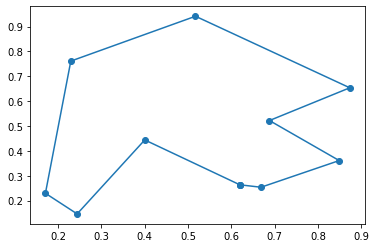

In [12]:
#4.2 Cyklist tour 
file = open('cities.dat', 'r')
data = file.readlines()

city = []
data = data[4:]
for a in data: 
    a = a.strip("\n")
    a = a.strip("\t")
    a = a.strip("''")
    a = a.strip(";")
    a = a.strip(" ")
    
    city.append(a)

c = 2
r = 10 
nodes = 20

matrix = []
for ci in city:
    ci = ci.split(",")
    matrix.append(ci)
    
matrix = np.array(matrix)
matrix = matrix.astype(float)
    
weight = np.random.rand(nodes,c)*0.2

epoch = 80
step = 0.2 

for i in range(epoch):
    d = np.zeros(nodes)
    for n in matrix: 
        for w in range(nodes): 
            d[w] = diff(n, weight[w])
        w = np.argmin(d)
        
        if epoch - i in range(int(epoch/2),epoch+1):
            size = 2    
        elif epoch - i in range(int(epoch/4),int(epoch/2)):
            size = 1
        else: 
            size = 0
        # 50 down to 0 or 1 
        maxn = w + size
        minn = w - size
        
        if maxn >nodes: 
            maxn = maxn-nodes
        if minn <0: 
            minn = minn+nodes
        #print(size, maxn,minn)
        #print(minn, maxn)
        for w in range(minn,maxn):
            weight[w] = weight[w] + step*(n - weight[w])
        #print(weight.shape)
            
pos = []
d = np.zeros(100)
pos.append(1)
for i,ci in enumerate(city):
    for w in range(nodes): 
        d[w] = diff(matrix[i], weight[w])
    w = np.argmin(d)
    pos.append(w)
    
possort = pos.copy()

possort.sort()

done = []
toprint = []
for i,p in enumerate(possort):
    index = pos.index(p)
    done.append(index)
    #print(index, done)
    toprint.append(city[pos.index(p)-1])
    #print(animal[pos.index(p)-1])
    pos[index] = 9999

x = []
y = []

#print(toprint)
for point in toprint:
    point = point.strip("'")
    p = point.split(", ") 
    x.append(float(p[0]))
    y.append(float(p[1]))
x.append(x[0])
y.append(y[0])

plt.scatter(x,y)
plt.plot(x,y)
    


[[0.19302425 0.11897654]
 [0.15009557 0.08543104]
 [0.17070369 0.22881688]
 [0.17069973 0.2292917 ]
 [0.17069786 0.22929723]
 [0.17049184 0.22898357]
 [0.3988622  0.44274746]
 [0.39999013 0.44389044]
 [0.39999575 0.44389571]
 [0.24918804 0.72405458]
 [0.22930415 0.76099131]
 [0.45674565 0.90356378]
 [0.58381953 0.88101899]
 [0.78832221 0.66588595]
 [0.75471613 0.57342436]
 [0.7914     0.42365453]
 [0.80334626 0.34979999]
 [0.68268272 0.26404813]
 [0.63691058 0.25997417]
 [0.62085858 0.26357948]]


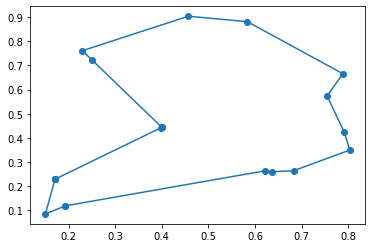

In [13]:
print(weight)

x = []
y = []

for p in weight:
    x.append(float(p[0]))
    y.append(float(p[1]))
    
x.append(x[0])
y.append(y[0])

plt.scatter(x,y)
plt.plot(x,y)

In [38]:
#data mp
file = open('mpdistrict.dat', 'r')
data = file.readlines()


dist = []
for r in data: 
    dist.append(int(r))

    
file = open('mpparty.dat', 'r')
data = file.readlines()

#data = data[]

party = []
for r in data: 
    party.append(int(r))

file = open('mpsex.dat', 'r')
data = file.readlines()

#data = data[]

sex = []
for r in data: 
    sex.append(int(r))
    
file = open('mpnames.txt', 'r')
data = file.readlines()

names = []
for r in data:
    r = r.strip("\n")
    names.append(r)

print(len(names))
print(names)

349
['Skårman Carl-Erik', 'Romanus Gabriel', 'Odenberg Mikael', 'Järrel Henrik S', 'Lindgren Sylvia', 'Ask Beatrice', 'Hoffmann Ulla', 'Nordlander Inger', 'Ruwaida Yvonne', 'Könberg Bo', 'Attefall Stefan', 'Agenberg Tomas', 'Papadopoulos Nikos', 'Lilliehöök Anna', 'Ohly Lars', 'Höij Helena', 'Larsson Kalle', 'Narti Ana Maria', 'Nordquist Kaj', 'Rojas Mauricio', 'Hassan Maria', 'Adelsohn Liljeroth Lena', 'Vestlund Börje', 'Carlsson i Tyresö Gunilla', 'Frans Joe', 'Sabuni Nyamko', 'Palm Veronica', 'Ohlsson Birgitta', 'Fridolin Gustav', 'Johansson Anita', 'Leijonborg Lars', 'Johansson Jan Emanuel', 'Schyman Gudrun', 'Lejon Britta', 'Odell Mats', 'Lennmarker Göran', 'Davidson Inger', 'Hamilton Björn', 'Reinfeldt Fredrik', 'Pilsäter Karin', 'Rask Ola', 'Lindberg Niclas', 'Arvidsson Eva', 'Osman Sherifay Mariam', 'Moberg Carina', 'Axelsson Christina', 'de Pourbaix-Lundin Marietta', 'Svensson Ingvar', 'Elmsäter-Svärd Catharina', 'Beiming Cinnika', 'Waidelich Tommy', 'Westman Henrik', 'Barghol

In [25]:
file = open('votes.dat', 'r')
data = file.readlines()

r = 349
c = 31

nodes = 100
data = data[0].split(',')

matrix = []
for i in range(r):
    matrix.append(data[c*i:c*(i+1)])
    
matrix = np.array(matrix)
matrix = matrix.astype(float)

print(matrix.shape)
    
weight = np.random.rand(nodes,31)*0.2
#print(weight.shape)

epoch = 80
step = 0.3

for i in range(epoch):
    d = np.zeros(nodes)
    for n in matrix: 
        for w in range(nodes): 
            d[w] = diff(n, weight[w])
        w = np.argmin(d)
        
        """"
        if epoch - i in range(int(epoch/2),epoch+1):
            size = 2    
        elif epoch - i in range(int(epoch/4),int(epoch/2)):
            size = 1
        else: 
            size = 0
        """
        # 50 down to 0 or 1 
        #print(50-(int(i*(50/(epoch)))))
        size = 25-(int(i*(25/(epoch))))
        #print(size)
        
        maxn = min(w + size, nodes)
        minn = max(w - size,0)
        #print(size, maxn,minn)
        #print(minn, maxn)
        for w in range(minn,maxn):
            weight[w] = weight[w] + step*(n - weight[w])
        #print(weight.shape)

print("done")
#print(weight)

(349, 31)
done


In [26]:
print(len(dist))
print(len(party))
print(len(sex))
print(len(names))

349
349
349
349


[1, 2, 1, 1, 3, 1, 4, 3, 5, 2, 6, 3, 3, 1, 4, 6, 4, 2, 3, 2, 3, 1, 3, 1, 3, 2, 3, 2, 5, 3, 2, 3, 0, 3, 6, 1, 6, 1, 1, 2, 3, 3, 3, 3, 3, 3, 1, 6, 1, 3, 3, 1, 2, 5, 4, 3, 1, 2, 2, 4, 7, 2, 1, 1, 5, 2, 2, 3, 1, 4, 7, 3, 1, 3, 3, 6, 5, 3, 2, 2, 1, 3, 3, 3, 3, 6, 3, 5, 4, 2, 7, 1, 3, 4, 3, 3, 5, 6, 7, 1, 3, 6, 1, 2, 3, 3, 3, 2, 1, 6, 6, 3, 3, 4, 3, 7, 3, 6, 3, 1, 2, 1, 7, 3, 3, 3, 6, 2, 7, 6, 3, 1, 4, 3, 3, 3, 2, 3, 3, 3, 3, 1, 6, 2, 3, 3, 3, 3, 3, 4, 3, 1, 2, 1, 3, 6, 1, 3, 3, 4, 3, 2, 2, 1, 3, 3, 3, 3, 2, 4, 3, 1, 1, 6, 1, 2, 5, 7, 1, 6, 3, 4, 3, 2, 3, 7, 1, 3, 3, 3, 3, 3, 3, 2, 4, 6, 2, 1, 7, 1, 3, 2, 4, 3, 2, 3, 1, 1, 4, 6, 1, 5, 6, 3, 3, 3, 2, 2, 3, 4, 1, 1, 3, 6, 7, 3, 2, 5, 2, 3, 3, 3, 5, 3, 1, 6, 3, 4, 2, 3, 7, 3, 3, 3, 2, 6, 1, 7, 3, 7, 6, 4, 3, 3, 3, 2, 1, 3, 3, 4, 3, 7, 2, 6, 1, 5, 3, 3, 3, 3, 3, 1, 4, 5, 2, 7, 3, 6, 3, 3, 3, 2, 1, 3, 3, 3, 7, 4, 6, 3, 3, 1, 2, 7, 5, 3, 3, 4, 6, 3, 3, 1, 3, 4, 7, 3, 3, 6, 5, 3, 2, 3, 3, 3, 3, 3, 7, 4, 6, 2, 1, 3, 3, 3, 1, 4, 7, 3, 3, 3, 4, 2, 3, 

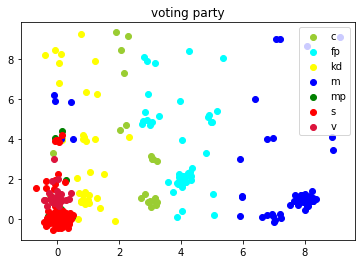

In [55]:
pos = []

d = np.zeros(nodes)
#pos.append(1)
for i,ci in enumerate(matrix):
    for w in range(nodes): 
        d[w] = diff(matrix[i], weight[w])
    w = np.argmin(d)
    pos.append(w)
    
possort = pos.copy()
pos1 = pos.copy()

possort.sort()

colors = ["blue", "aqua", "red", "crimson", "green", "yellow", "yellowgreen"]
l = ["m", "fp", "s", "v", "mp","kd","c"]

#party
toprintParty = []

print(party)

for i,p in enumerate(pos):
    index = pos.index(p)
    #print(index, done)
    toprintParty.append(party[pos.index(p)])
    #print(animal[pos.index(p)-1])
    pos[index] = 9999
    

print(toprintParty)
x = []
y = []
c = []
label = []
for i,item in enumerate(pos1): 
    x.append(item//10 + np.random.normal(0, 0.2))
    y.append(item%10 + np.random.normal(0, 0.2))
    #print(i,toprintParty[i])
    c.append(colors[toprintParty[i]-1])
    label.append(l[toprintParty[i]-1])
    
fig, ax = plt.subplots()
scatter_x = np.array(x)
scatter_y = np.array(y)
group = np.array(label)
for g in np.unique(group):
    i = np.where(group == g)
    
    ax.scatter(scatter_x[i], scatter_y[i],color = colors[l.index(g)], label=g)
ax.legend()
plt.title("voting party")
plt.show()

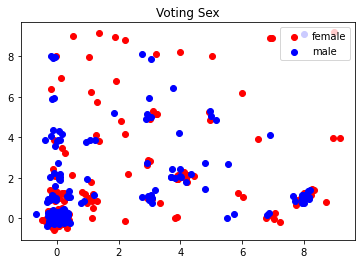

In [67]:
#sex
pos = []
d = np.zeros(nodes)
for i,ci in enumerate(matrix):
    for w in range(nodes): 
        d[w] = diff(matrix[i], weight[w])
    w = np.argmin(d)
    pos.append(w)
    
possort = pos.copy()
pos1 = pos.copy()

possort.sort()

colors = ["blue","red"]
l = ["male", "female"]

done = []
toprintSex = []
for i,p in enumerate(pos):
    index = pos.index(p)
    done.append(index)
    #print(index, done)
    toprintSex.append(sex[pos.index(p)])
    #print(animal[pos.index(p)-1])
    pos[index] = 9999
    if i >= 348:
        break
        
x = []
y = []
c = []
label = []
for i,item in enumerate(pos1): 
    x.append(item//10 + np.random.normal(0, 0.2))
    y.append(item%10 + np.random.normal(0, 0.2))
    c.append(colors[toprintSex[i]-1])
    label.append(l[toprintSex[i]-1])

fig, ax = plt.subplots()
scatter_x = np.array(x)
scatter_y = np.array(y)
group = np.array(label)
for g in np.unique(group):
    i = np.where(group == g)
    
    ax.scatter(scatter_x[i], scatter_y[i],color = colors[l.index(g)], label=g)
ax.legend()
plt.title("Voting Sex")
plt.show()


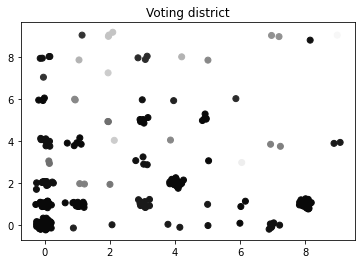

In [66]:
#dist
pos = []
d = np.zeros(nodes)
for i,ci in enumerate(matrix):
    for w in range(nodes): 
        d[w] = diff(matrix[i], weight[w])
    w = np.argmin(d)
    pos.append(w)
    
possort = pos.copy()
pos1 = pos.copy()

possort.sort()
done = []
toprintDist = []
for i,p in enumerate(pos):
    index = pos.index(p)
    done.append(index)
    #print(index, done)
    toprintDist.append(dist[pos1.index(p)])
    #print(animal[pos.index(p)-1])
    pos[index] = 9999
    if i >= 349:
        break
    
x = []
y = []
c = []
for i,item in enumerate(pos1): 
    x.append(item//10 + np.random.normal(0, 0.1))
    y.append(item%10 + np.random.normal(0, 0.1))
    value = toprintDist[i]
    tupple = (value/30,value/30,value/30)
    c.append(tupple)
    
plt.scatter(x,y,color = c)
plt.title("Voting district")
plt.show()
     
#name?

[0, 15, 3, 0, 87, 3, 56, 87, 73, 15, 31, 87, 87, 0, 59, 35, 59, 15, 87, 39, 87, 0, 87, 42, 87, 8, 87, 7, 73, 47, 7, 51, 59, 87, 37, 0, 37, 0, 44, 39, 87, 87, 87, 87, 79, 87, 3, 35, 0, 87, 99, 3, 11, 73, 53, 87, 0, 15, 15, 59, 22, 15, 44, 42, 73, 15, 12, 87, 0, 56, 20, 87, 0, 87, 87, 28, 51, 87, 7, 12, 0, 80, 87, 87, 91, 35, 87, 73, 63, 11, 20, 3, 87, 60, 87, 87, 73, 37, 20, 4, 87, 35, 0, 15, 87, 87, 77, 12, 3, 28, 41, 87, 87, 53, 87, 20, 99, 37, 87, 3, 15, 0, 22, 47, 87, 51, 35, 12, 22, 31, 77, 0, 56, 87, 87, 87, 15, 87, 87, 87, 87, 42, 35, 15, 87, 87, 77, 87, 87, 59, 87, 0, 15, 3, 51, 35, 0, 87, 87, 60, 87, 39, 12, 3, 99, 99, 44, 87, 15, 46, 87, 0, 0, 35, 0, 15, 67, 22, 0, 27, 87, 63, 87, 15, 87, 20, 0, 80, 87, 87, 87, 87, 87, 15, 59, 35, 39, 0, 22, 3, 87, 39, 59, 87, 15, 87, 0, 0, 60, 31, 0, 49, 35, 87, 87, 87, 15, 7, 87, 56, 3, 0, 47, 31, 22, 87, 12, 44, 39, 87, 87, 87, 68, 87, 0, 44, 87, 56, 39, 87, 20, 80, 90, 44, 7, 35, 0, 46, 87, 20, 35, 59, 87, 87, 87, 15, 0, 87, 87, 64, 87, 20

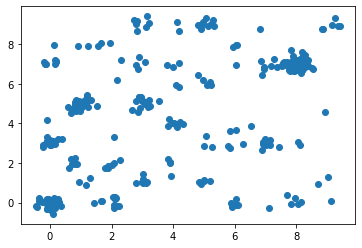

In [9]:
print(pos)


x = []
y = []
for item in pos: 
    x.append(item//10 + np.random.normal(0, 0.20))
    y.append(item%10 + np.random.normal(0, 0.20))
    
plt.scatter(x,y)